## How a Decision Tree Learns

A classification tree works by recursively partitioning the data into smaller and smaller subsets. The goal at each step is to create subsets that are as "pure" as possible—meaning they contain instances of a single class.

  * **The Process**: The algorithm starts at the **root node** with the entire dataset. It then searches through every feature and every possible split point for that feature to find the single best split—the one that does the best job of separating the classes. This split creates two new **child nodes**, and the data is divided between them. This process is repeated for each new node until a stopping criterion is met.
  * **Making a Prediction**: To classify a new data point, you simply drop it down the tree. It follows the "True" or "False" path at each node based on its feature values until it reaches a final, un-split node, called a **leaf node**. The prediction is then the majority class of the training samples that ended up in that particular leaf.

The complexity of the tree is controlled by hyperparameters, the most important of which is `max_depth`, which limits the number of splits from the root to any leaf. This helps to prevent the model from overfitting to the training data.

### Decision Trees vs. Linear Models

Decision trees differ from linear models like Logistic Regression in two fundamental ways:

1.  **Decision Boundary**: A linear model always creates a single straight-line (or hyperplane) decision boundary. In contrast, a Decision Tree creates **axis-parallel, rectangular decision regions**. This is because each split is based on a single feature.

2.  **Flexibility**: This rectangular partitioning allows decision trees to capture complex, **non-linear relationships** between features and the target, which linear models cannot.

A major practical advantage of decision trees is that they are **insensitive to the scale of the features**. Since each split is a simple threshold on a single feature (e.g., `radius_mean <= 14.98`), it doesn't matter if one feature is measured in millimeters and another in kilometers. You don't need to apply `StandardScaler` or other scaling methods before training a decision tree.

### Implementation in `scikit-learn`

Let's walk through the process of training and evaluating a `DecisionTreeClassifier`.

```python
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier, plot_tree
from sklearn.metrics import accuracy_score
from sklearn.datasets import load_breast_cancer

# 1. Load a sample dataset
cancer = load_breast_cancer()
X = pd.DataFrame(cancer.data, columns=cancer.feature_names)
y = pd.Series(cancer.target)

# For simplicity, let's use the same two features from the example
X_simple = X[['mean radius', 'mean concave points']]

# 2. Perform a train/test split
# 'stratify=y' is crucial for classification to ensure the train and test sets
# have the same proportion of class labels as the original dataset.
X_train, X_test, y_train, y_test = train_test_split(
    X_simple, y, 
    test_size=0.2, 
    stratify=y, 
    random_state=1
)

# 3. Instantiate and fit the model
# 'max_depth' controls complexity to prevent overfitting.
# 'random_state' ensures reproducibility.
dt = DecisionTreeClassifier(max_depth=3, random_state=1)
dt.fit(X_train, y_train)

# 4. Make predictions and evaluate performance
y_pred = dt.predict(X_test)
accuracy = accuracy_score(y_test, y_pred)

print(f"Test Set Accuracy: {accuracy:.4f}")
```

### Visualizing the Tree

One of the greatest strengths of a decision tree is its interpretability. We can directly visualize the rules the model has learned using `sklearn.tree.plot_tree`.

```python
# Visualize the trained Decision Tree
fig, ax = plt.subplots(figsize=(20, 10))

plot_tree(
    dt,
    filled=True,
    feature_names=X_simple.columns,
    class_names=cancer.target_names,
    ax=ax,
    fontsize=12
)

plt.title("Visual representation of the trained Decision Tree", fontsize=16)
plt.show()
```

This visualization provides a clear, interpretable flowchart of the exact logic the model is using to make its classifications, making it a powerful tool for both analysis and communication.

In [1]:
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
import pandas as pd

In [2]:
url = "https://assets.datacamp.com/production/repositories/1796/datasets/0eb6987cb9633e4d6aa6cfd11e00993d2387caa4/wbc.csv"
wbc_df = pd.read_csv(url, usecols=lambda col: not col.startswith("Unnamed"))
wbc_df.head()

,id,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,...,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst
0,842302,M,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,...,25.38,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890
1,842517,M,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,...,24.99,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902
2,84300903,M,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,...,23.57,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758
3,84348301,M,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,...,14.91,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300
4,84358402,M,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,...,22.54,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678


In [ ]:
from sklearn.model_selection import train_test_split

# Map diagnosis to binary: 'M' (malignant) to 1, 'B' (benign) to 0 for classification
wbc_df["diagnosis"] = wbc_df["diagnosis"].map({"M": 1, "B": 0})

# Select features: radius_mean and concave points_mean as predictors
X = wbc_df[["radius_mean", "concave points_mean"]]

# Select target: diagnosis as the binary outcome variable
y = wbc_df["diagnosis"]

# Split data into train/test sets (80/20), stratify to maintain class balance, set random_state for reproducibility
X_train, X_test, y_train, y_test = train_test_split(
	X, y, test_size=0.2, random_state=42, stratify=y
)

In [10]:
# Import DecisionTreeClassifier: This class implements a decision tree algorithm for classification tasks, which recursively splits data based on feature thresholds to minimize impurity.
from sklearn.tree import DecisionTreeClassifier

# Instantiate the classifier: max_depth limits tree depth to prevent overfitting by controlling complexity; random_state ensures reproducible results across runs.
dt = DecisionTreeClassifier(max_depth=6, random_state=42)

dt.fit(X_train, y_train)

y_pred = dt.predict(X_test)

print(y_pred[0:5])

[0 1 0 1 0]


In [11]:
from sklearn.metrics import accuracy_score

# Generate predictions on the test set using the trained decision tree model.
y_pred = dt.predict(X_test)

# Calculate the accuracy as the fraction of correct predictions over total predictions.
acc = accuracy_score(y_test, y_pred)

print(f"Test set accuracy: {acc:.2f}")

Test set accuracy: 0.89


c:\Users\jhonm\.conda\envs\datacamp\Lib\site-packages\sklearn\utils\validation.py:2749: UserWarning: X does not have valid feature names, but LogisticRegression was fitted with feature names
  warnings.warn(
c:\Users\jhonm\.conda\envs\datacamp\Lib\site-packages\sklearn\utils\validation.py:2749: UserWarning: X does not have valid feature names, but DecisionTreeClassifier was fitted with feature names
  warnings.warn(


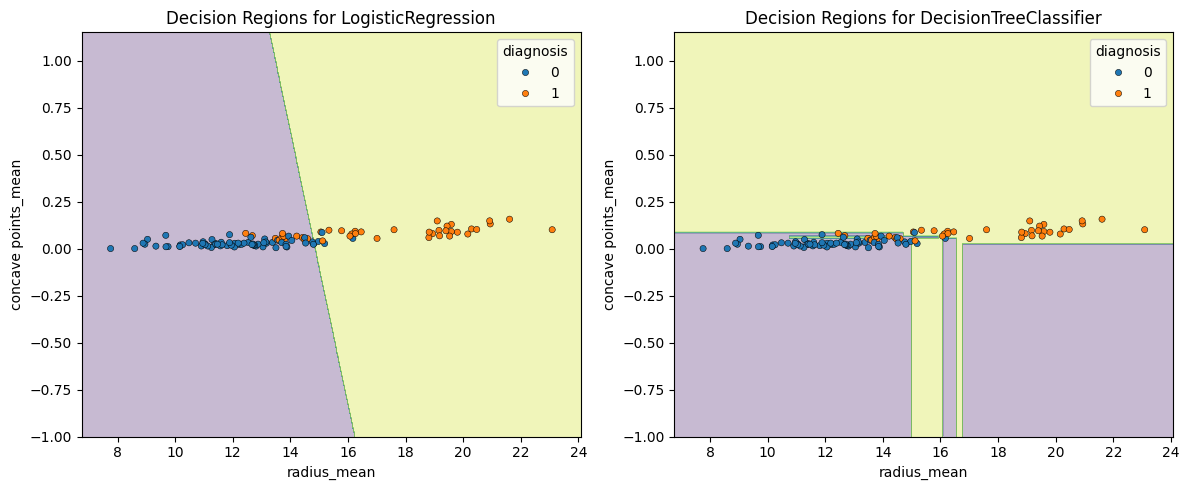

In [12]:
from sklearn.linear_model import LogisticRegression
from data.plot_labeled_decision_regions import plot_labeled_decision_regions

logreg = LogisticRegression(random_state=42)

logreg.fit(X_train, y_train)

clfs = [logreg, dt]

# Review the decision regions of the two classifiers
plot_labeled_decision_regions(X_test, y_test, clfs)

A classification tree learns by **recursively splitting** the data at each **node**. The algorithm chooses the feature and split-point that maximizes **Information Gain**, which is a measure of how much a split reduces the impurity of the data. This process aims to create the "purest" possible **leaf nodes**, where most samples belong to a single class. The impurity of a node is typically measured by a criterion like the **Gini index** or **entropy**.


## The Building Blocks of a Decision Tree

A decision tree is a hierarchical data structure composed of different types of **nodes**. Each node represents either a question about the data or a final prediction.

There are three types of nodes in the hierarchy:

  * **Root Node**: The single top-most node where the tree begins. It has no parent and asks the first question, splitting the entire dataset into two child nodes.
  * **Internal Node**: Any node that has one parent and two children. It represents an intermediate if-else question in the decision-making process.
  * **Leaf Node**: A terminal node with no children. This is where a final prediction is made. The prediction is the majority class of the training samples that have filtered down to that specific leaf.


### The Learning Algorithm: Maximizing Information Gain

The primary goal of the learning algorithm is to build a tree that produces the purest possible leaf nodes. It achieves this by making the most informative split at each step, a process guided by the principle of **Information Gain**.

#### Information Gain (IG)

At each node, the algorithm must decide which feature and which split-point to use. It does this by evaluating every possible split and choosing the one that maximizes the **Information Gain**. Information Gain is the reduction in impurity achieved by splitting a parent node into two child nodes.

The formula for Information Gain is:

$$IG(\text{parent}) = I(\text{parent}) - \left( \frac{N_{\text{left}}}{N} I(\text{left}) + \frac{N_{\text{right}}}{N} I(\text{right}) \right)$$

Where:

  * $I(\text{node})$ is the impurity of a given node.
  * $N$ is the total number of samples at the parent node.
  * $N_{\text{left}}$ and $N_{\text{right}}$ are the number of samples in the two child nodes.

In simple terms, a split is considered good if the weighted average impurity of the child nodes is much lower than the impurity of the parent node.

#### Measuring Impurity: The Gini Index

To calculate Information Gain, we first need a way to measure the impurity of a single node. The most common criterion is the **Gini index**.

The Gini index for a node is calculated as:
$$Gini = 1 - \sum_{i=1}^{k} (p_i)^2$$
Where `k` is the number of classes and $p_i$ is the proportion of samples belonging to class `i` at that node.

  * **Interpretation**: The Gini index measures the probability of misclassifying a randomly chosen element if it were randomly labeled according to the distribution of labels in the node.
      * A Gini index of **0** indicates a **perfectly pure node** (all samples belong to a single class).
      * A Gini index of **0.5** (for a binary classification problem) indicates a **maximally impure node** (samples are split 50/50 between the two classes).

#### The Recursive Splitting Process

The tree is built through a recursive process:

1.  Start at the root node with all the training data.
2.  For the current node, calculate the Information Gain for every possible split.
3.  Choose the split that yields the maximum Information Gain.
4.  Create two child nodes and distribute the data to them based on the split.
5.  Repeat this process for each new child node.
6.  The process stops when a node becomes a leaf, which occurs if a stopping criterion is met (e.g., `max_depth` is reached) or if the Information Gain for any further split would be zero (the node is already pure).

### Implementation in `scikit-learn`

In `scikit-learn`, you can control the impurity measure used by the `DecisionTreeClassifier` with the `criterion` hyperparameter. The default is `'gini'`, but you can also set it to `'entropy'`, another common impurity measure.

```python
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score
from sklearn.datasets import load_breast_cancer

# 1. Load a sample dataset
cancer = load_breast_cancer()
X = pd.DataFrame(cancer.data, columns=cancer.feature_names)
y = pd.Series(cancer.target)

# 2. Perform a stratified train/test split
X_train, X_test, y_train, y_test = train_test_split(
    X, y, 
    test_size=0.2, 
    stratify=y, 
    random_state=1
)

# 3. Instantiate and fit the model using the Gini criterion
# This tells the algorithm to use the Gini index to calculate information gain at each split.
dt_gini = DecisionTreeClassifier(
    criterion='gini',
    max_depth=4, 
    random_state=1
)
dt_gini.fit(X_train, y_train)

# 4. Make predictions and evaluate performance
y_pred = dt_gini.predict(X_test)
accuracy = accuracy_score(y_test, y_pred)

print(f"Test Set Accuracy: {accuracy:.4f}")
```

